Импортируем необходимые библиотеки и алгоритмы

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import *
from sklearn.neural_network import MLPClassifier

Загружаем датасет

Датасет https://www.kaggle.com/competitions/alfa-bank-pd-credit-history/data

In [62]:
data = pd.read_parquet(r'train_data_0.pq')
data

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,4,1,9,14,8,10,11,8,4,...,3,3,3,4,1,2,3,1,0,1
1974720,249998,5,7,9,4,8,1,11,19,1,...,3,3,3,4,1,2,4,1,1,1
1974721,249999,1,9,0,10,8,10,11,16,2,...,3,3,3,4,1,2,3,1,0,1
1974722,249999,2,9,16,10,13,10,4,12,2,...,3,3,3,4,1,2,3,1,0,0


In [63]:
y = pd.read_csv('train_target.csv')
y = y[y['id'] < 250000]
y

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
249995,249995,0
249996,249996,0
249997,249997,0
249998,249998,0


Данный датасет содержит 250000 человек, где каждый из них оставил заявку на получение нескольких банковских услуг. В отдельном файле расположены принятые банком решения относительно каждого клиента. В датасете содержатся такие данные, как:

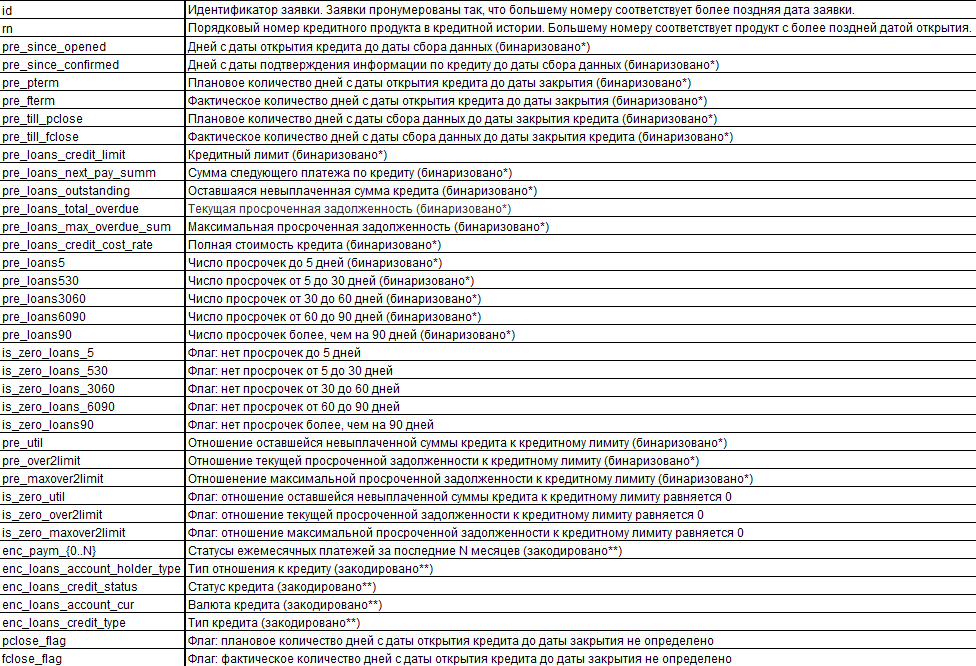

**Первичный анализ**

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974724 entries, 0 to 1974723
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19  

Все признаки изначально числовые и не требуют преобразования

In [65]:
data.drop(['id', 'rn'], axis = 1).describe()

,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
count,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1974724.0,...,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06,1.974724e+06
mean,9.271325e+00,8.330264e+00,8.299071e+00,8.309444e+00,6.991781e+00,8.337011e+00,9.740888e+00,2.399848e+00,3.012951e+00,0.0,...,2.313242e+00,2.343014e+00,2.376717e+00,3.576724e+00,1.027562e+00,2.694898e+00,3.353936e+00,1.002386e+00,1.721385e-01,2.239336e-01
std,5.773757e+00,4.593511e+00,5.245598e+00,4.464844e+00,5.184165e+00,4.233992e+00,5.799625e+00,1.376391e+00,6.838444e-01,0.0,...,1.247674e+00,1.228473e+00,1.205555e+00,1.035586e+00,2.767022e-01,4.891363e-01,1.057304e+00,5.909327e-02,3.775009e-01,4.168782e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,5.000000e+00,4.000000e+00,6.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,2.000000e+00,3.000000e+00,0.0,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,9.000000e+00,9.000000e+00,8.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,1.000000e+01,2.000000e+00,3.000000e+00,0.0,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.400000e+01,1.100000e+01,1.300000e+01,1.200000e+01,1.200000e+01,1.100000e+01,1.500000e+01,2.000000e+00,3.000000e+00,0.0,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.900000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.500000e+01,1.900000e+01,6.000000e+00,5.000000e+00,0.0,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00


Из-за нехватки мощностей выберем из датасета 30000 первых объектов

In [67]:
data2 = data[data['id'] < 30000]
data2

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232111,29999,18,3,3,2,9,7,14,9,2,...,3,3,3,4,1,3,4,1,0,0
232112,29999,19,11,10,14,7,14,8,2,5,...,3,3,3,4,1,2,4,1,0,0
232113,29999,20,1,9,14,8,10,11,0,0,...,3,3,3,4,1,2,4,1,0,1
232114,29999,21,7,6,4,6,1,2,7,0,...,3,3,3,4,1,3,3,1,1,0


In [68]:
y2 = y[y['id'] < 30000]

<Axes: xlabel='flag', ylabel='count'>

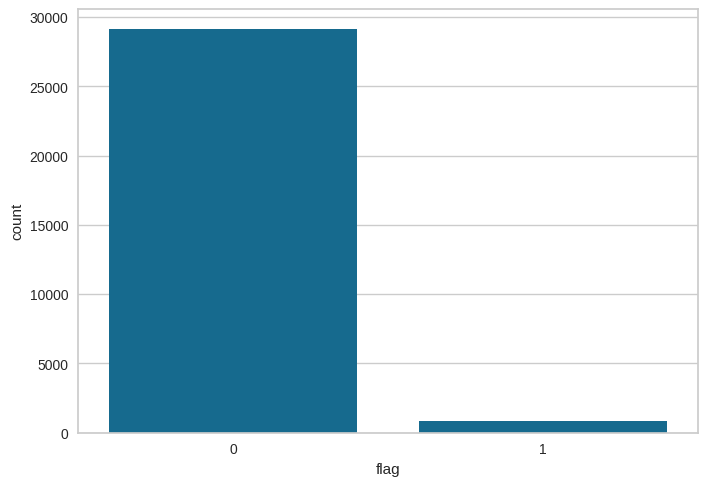

In [69]:
sns.countplot(x='flag', data=y2)

Наблюдается сильный дисбалнс классов, выровняем из, удалив случайные элементы мажоритарного класса

In [70]:
reserve = copy.deepcopy(y2)
class1 = np.where(reserve['flag'] == 1)[0]
class2 = np.where(reserve['flag'] == 0)[0]

In [71]:
ids = random.sample(set(class2), len(class2) - len(class1))
reserve = reserve.drop(ids)
data2 = data2.drop(np.where(data2['id'].isin(ids))[0], axis = 0)
reserve = reserve.reset_index(drop = True)

<ipython-input-71-c04ed41d2539>:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  ids = random.sample(set(class2), len(class2) - len(class1))


In [72]:
data2

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
152,20,1,8,14,7,6,4,9,13,2,...,3,3,3,4,1,4,4,1,0,0
153,20,2,18,3,11,16,15,14,4,2,...,0,0,0,1,1,3,3,1,0,0
154,20,3,5,17,4,3,5,7,4,2,...,3,3,3,4,1,3,5,1,0,0
155,20,4,5,17,4,3,5,7,4,2,...,3,3,3,4,1,3,5,1,0,0
156,20,5,5,17,4,3,5,7,4,2,...,3,3,3,4,1,3,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231934,29976,1,4,9,13,0,16,7,18,6,...,3,3,3,4,1,3,4,1,0,0
231935,29976,2,17,12,9,0,11,0,13,2,...,3,3,3,4,1,3,4,1,0,0
231936,29976,3,3,9,4,8,1,11,8,3,...,0,0,0,4,1,2,3,1,1,1
231937,29976,4,11,13,16,9,15,6,1,2,...,3,3,3,4,1,3,4,1,0,0


In [73]:
y1 = reserve
y1

,id,flag
0,20,1
1,40,1
2,44,0
3,54,1
4,85,0
...,...,...
1755,29934,1
1756,29945,1
1757,29958,0
1758,29959,0


возьмем средневзвешанное по номеру объекта по каждому столбцу

In [74]:
def weighted_average(group):
    weights = group['rn']
    values = group.iloc[:, 2:]  # Выбираем столбцы со значениями для расчета
    return (values.mul(weights, axis=0).sum()) / weights.sum()

# Применяем функцию к каждой группе с одинаковым person_id
result = data2.groupby('id').apply(weighted_average)

result

,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
id,,,,,,,,,,,,,,,,,,,,,
20,8.800000,11.633333,6.375000,5.833333,7.275000,10.783333,8.600000,2.250000,2.925000,0.0,...,2.725000,2.950000,2.950000,3.950000,1.0,2.808333,4.475000,1.0,0.125000,0.200000
40,7.533333,4.333333,5.800000,6.800000,6.933333,9.000000,10.200000,2.533333,3.666667,0.0,...,3.000000,3.000000,3.000000,4.000000,1.0,2.200000,3.333333,1.0,0.266667,0.600000
44,10.428571,6.142857,10.190476,6.666667,4.666667,8.142857,12.238095,2.952381,2.761905,0.0,...,3.000000,3.000000,3.000000,4.000000,1.0,2.428571,3.666667,1.0,0.428571,0.571429
54,8.200000,9.200000,9.933333,5.933333,10.600000,11.800000,15.533333,2.400000,3.133333,0.0,...,2.000000,2.000000,2.000000,3.600000,1.0,2.466667,3.800000,1.0,0.200000,0.533333
85,10.500000,14.600000,8.500000,8.500000,11.300000,13.300000,9.500000,1.700000,3.200000,0.0,...,2.400000,2.400000,2.600000,4.000000,1.0,2.800000,3.800000,1.0,0.200000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,9.064327,11.269006,5.625731,6.596491,6.269006,8.590643,9.941520,2.421053,3.000000,0.0,...,2.877193,2.877193,2.912281,3.912281,1.0,3.087719,4.035088,1.0,0.257310,0.321637
29945,4.000000,17.000000,4.000000,8.000000,1.000000,11.000000,14.000000,2.000000,3.000000,0.0,...,3.000000,3.000000,3.000000,4.000000,1.0,3.000000,3.000000,1.0,1.000000,1.000000
29958,9.516667,9.750000,9.916667,9.241667,6.858333,8.583333,11.683333,2.883333,3.250000,0.0,...,1.750000,2.050000,2.450000,3.675000,1.0,2.866667,3.716667,1.0,0.175000,0.175000


In [75]:
#sns.pairplot(result)

In [76]:
data2 = data2.drop('id', axis = 1)

In [77]:
y1 = y1.drop('id', axis = 1).to_numpy().reshape(1, -1)[0]
y1

array([1, 1, 0, ..., 0, 0, 1])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(result, y1, test_size=0.2, random_state = 42)

**Обучение моделей, оценка их качества и выявление наилучшей из них**

Проверим различные модели классификации

В качестве определяющей метрики будем использовать f1-score так как она является одной из самых объективных метрик для задачи классификации

In [79]:
import time

models = [LogisticRegression(), Perceptron(), KNeighborsClassifier(),
          DecisionTreeClassifier(), SVC(),
          GaussianNB(), GradientBoostingClassifier(), AdaBoostClassifier(),
          RandomForestClassifier(), MLPClassifier(), RidgeClassifier()]

names = ['LogisticRegression', 'Perceptron', 'KNeighborsClassifier',
         'DecisionTreeClassifier', 'SVC', 'GaussianNB',
         'GradientBoostingClassifier', 'AdaBoostClassifier',
         'RandomForestClassifier', 'MLPClassifier', 'RidgeClassifier']

f1 = []
times = []

scores = {}

for i in range(len(models)):
  model = models[i]
  start = time.time()
  model.fit(X_train, y_train)
  end = time.time()
  y_pred = model.predict(X_test)
  score = f1_score(y_test, y_pred)
  f1.append(round(score, 3))
  times.append(round((end - start),3))

scores['name'] = names
scores['f1-score'] = f1
scores['time'] = times

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
pd.DataFrame(scores)

,name,f1-score,time
0,LogisticRegression,0.624,0.056
1,Perceptron,0.620,0.012
2,KNeighborsClassifier,0.546,0.004
3,DecisionTreeClassifier,0.563,0.073
4,SVC,0.560,0.135
5,GaussianNB,0.339,0.004
6,GradientBoostingClassifier,0.632,1.552
7,AdaBoostClassifier,0.603,0.404
8,RandomForestClassifier,0.641,0.638
9,MLPClassifier,0.670,0.562


Моделью с наилучшей метрикой оказался многослойный перцептрон (MLPClassifier), однако эта же модель обучается очень долго. Поэтому в качестве наиболее эффективной модели выберем дерево решений (RidgeClassifier), так как она обучается очень быстро и по качеству несильно уступает многослойному перцептрону

**Влияние разбиения и гиперпараметров**

Теперь проверим влияние размера обучающей выборки на обучение модели Гребневого классификатора

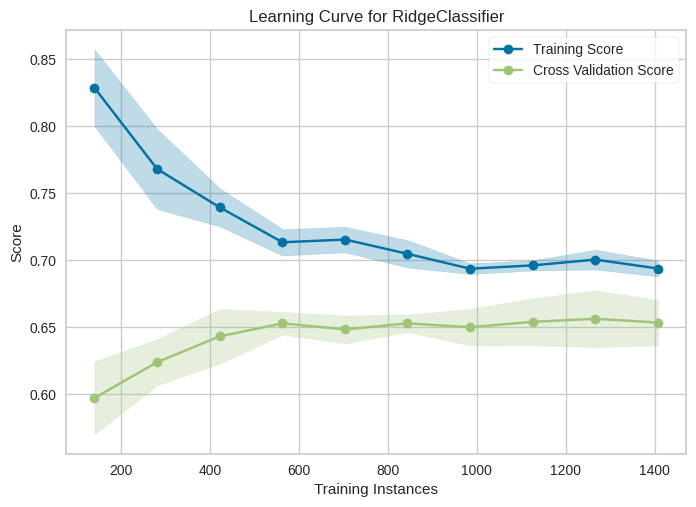

In [80]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    RidgeClassifier(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(result, y1).show()

Из графика обучения видно, что наилучший размер обучающей выборки - 90 %, однако существенных различий не наблюдается, за исключением начальных значений 10-30 %, где наблюдается явная нехватка размеров обучающей выборки

У Гребневого классификатора всего один гиперпараметра - alpha.

Для выявления влияния гиперпараметров на модель будем использовать функционал библиотеки Optuna, такой как create_study и optimize

In [82]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.6 MB/s eta 0:00:00


In [93]:
import optuna

X_train, X1, y_train, Y1 = train_test_split(result, y1, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X1, Y1, test_size=0.5, random_state=42)
X_val.shape, X_test.shape, X_train.shape

def objective(trial):
    params = {
        'alpha': trial.suggest_float('alpha', 0.000001, 1000),
    }

    model = RidgeClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = -f1_score(y_pred, y_val)
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Best hyperparameters:", study.best_params)

[I 2024-05-09 16:41:27,175] A new study created in memory with name: no-name-d57de50d-45ee-43e1-8aa2-8868bf6a19a5
[I 2024-05-09 16:41:27,208] Trial 0 finished with value: -0.6303030303030304 and parameters: {'alpha': 312.15567749831115}. Best is trial 0 with value: -0.6303030303030304.
[I 2024-05-09 16:41:27,240] Trial 1 finished with value: -0.6566265060240964 and parameters: {'alpha': 130.0790939648685}. Best is trial 1 with value: -0.6566265060240964.
[I 2024-05-09 16:41:27,273] Trial 2 finished with value: -0.6261398176291794 and parameters: {'alpha': 488.86968376022674}. Best is trial 1 with value: -0.6566265060240964.
[I 2024-05-09 16:41:27,307] Trial 3 finished with value: -0.6303030303030304 and parameters: {'alpha': 520.0223610223844}. Best is trial 1 with value: -0.6566265060240964.
[I 2024-05-09 16:41:27,334] Trial 4 finished with value: -0.6200607902735562 and parameters: {'alpha': 612.4268629034856}. Best is trial 1 with value: -0.6566265060240964.
[I 2024-05-09 16:41:27,3

Best hyperparameters: {'alpha': 17.656176161983574}


Как мы видим, наилучшим значением является alpha = 17.66. Проверим метрику f1 у модели с наилучшим значением alpha

In [117]:
model = RidgeClassifier(alpha = 17.66)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
y_pred = model.predict(X_test)
score = f1_score(y_test, y_pred)
print('f1-score:', round(score, 3), ' time:', round(end-start, 3))

f1-score: 0.654  time: 0.011


Как мы видим, метрика увеличилась на 0.045 по сравнению со стандартной моделью, а время увеличилось на 0.003 секунды

**Проверка на робастность**

Для проверки модели на робастность будем использовать кросс-валидацию

Так как дисбаланс классов устранён и объём выборки достаточно большой, будем использовать K-Fold

In [119]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
model = RidgeClassifier(alpha = 17.66)
scores = []
for train_index, test_index in kfold.split(result):
    X_train, X_test = result.iloc[train_index], result.iloc[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    scores.append(score)
    print(f'f1_score: {round(score, 3)}')

f1_score: 0.665
f1_score: 0.6
f1_score: 0.637
f1_score: 0.672
f1_score: 0.638


In [120]:
np.mean(scores)

0.6423129181077357

Таким образом, мы видим, что модель гребневого классификатора не зависит от разбиения, то есть обладает сильной робастностью

**Выводы**

В данной задаче кредитного скоринга вполне были усешно применены методы машинного обучения для предсказания платежеспособности клиента. Результаты этого исследования имеют важное значение для банковских структур так как помогут им успешно внедрить методы машинного обучения для решения задачи кредитного скоринга

Были использованы алгоритмы: LogisticRegression, Perceptron, KNeighborsClassifier, DecisionTreeClassifier, SVC, GaussianNB, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, MLPClassifier, RidgeClassifier

И по результатам сравнения метрики f1-score и скорости обучения наилучшим из них оказался Гребневый классификатор (RidgeClassifier)

И по результатам сравнения наилучшим из них оказался Гребневый классификатор (RidgeClassifier) с alpha = 17,66 с метрикой f1_score = 0,654.


Данная модель успешно прошла проверку на робастность.


В общем, методы машинного обучения могут быть применены в задаче кредитного скоринга, однако алгоритмы нуждаются в улучшении и доработке.
